<a href="https://colab.research.google.com/github/ishwarvenugopal/ML-DL_Implementation/blob/master/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [4]:
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	new_samples=np.random.choice(sample,(iterations,sample_size))
	data_mean=new_samples.mean()
	sample_means=np.array([])
	for row in new_samples:
		sample_means=np.append(sample_means,row.mean())
	sample_means=np.sort(sample_means)
	limit=(100-ci)/2 #ci is the confidence interval
	lower=np.percentile(sample_means,limit)
	upper=np.percentile(sample_means,100-limit)
	return data_mean, lower, upper

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

(0.0, 100000.0)

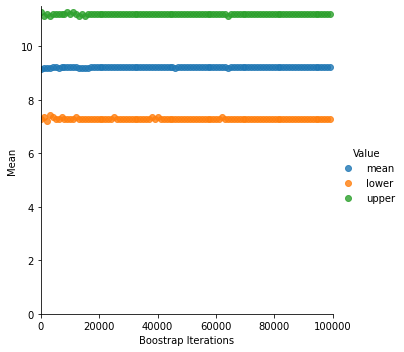

In [8]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
